<a href="https://colab.research.google.com/github/318281029SBH/Escuela/blob/main/K_neighbors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load Data

In [ ]:
df1=pd.read_csv('/content/drive/MyDrive/Ex2KN/Copia de audio_features.csv')

In [ ]:
df2=pd.read_csv('/content/drive/MyDrive/Ex2KN/Copia de summary.csv')

In [ ]:
df1['track_id'] = df1['track_id'].astype(str)
df2['track_id'] = df2['track_id'].astype(str)
data=pd.merge(df1, df2, on='track_id', how='inner')

In [ ]:
vard=['codec', 'downmix','equal_loudness','lossless', 'replay_gain',
      'sample_rate','md5_encoded',
       'mode_confidence','key_confidence','key','time_signature_confidence','title',
       'release', 'artist_id','artist_name',
 'release', 'year','end_of_fade_in','start_of_fade_out',
       'analysis_sample_rate_x','analysis_sample_rate_y','song_id','time_signature','energy','femaleness']

In [ ]:
data.drop(vard,axis=1,inplace=True)

In [ ]:
data.columns

Index(['bit_rate', 'length', 'track_id', 'danceability', 'acousticness',
       'aggressiveness', 'electronicity', 'happiness', 'festiveness',
       'relaxation', 'sadness', 'brightness', 'tonality', 'insrumentalness',
       'duration', 'tempo', 'artist_hotttnesss', 'loudness'],
      dtype='object')

In [ ]:
data

,bit_rate,length,track_id,danceability,acousticness,aggressiveness,electronicity,happiness,festiveness,relaxation,sadness,brightness,tonality,insrumentalness,duration,tempo,artist_hotttnesss,loudness
0,128056,60.081612,TRLCHOG12903CBE201,0.728646,2.266771e-09,0.999996,0.075123,0.683977,0.510561,0.103477,0.004121,0.217572,0.294421,0.002060,149.21098,117.349,0.400237,-4.460
1,128056,60.029366,TREQXBJ128F934E3CE,0.017633,9.705600e-01,0.000016,0.173669,0.044266,0.002073,0.990112,0.976110,0.394722,0.994963,0.996827,219.63710,62.154,0.392685,-19.085
2,128056,60.081612,TRGRCXR12903CFD7CD,0.167005,9.027991e-01,0.116882,0.156126,0.461002,0.079624,0.635178,0.797037,0.962334,0.921192,0.001401,145.65832,145.698,0.449608,-13.211
3,128000,60.081635,TRTOZPV128F92D71AC,0.694412,4.715616e-01,0.034741,0.532327,0.500000,0.298832,0.218486,0.653770,0.456679,0.970731,0.012652,275.19955,145.065,0.537800,-8.191
4,128111,30.040817,TRKNISH128F42627EA,0.226367,3.517592e-02,0.682841,0.190215,0.651303,0.684198,0.255997,0.102924,0.248094,0.973870,0.383030,251.42812,171.907,0.444158,-10.567
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17103,128111,30.040817,TRDPAJY128F92FC55C,0.168015,3.540825e-01,0.055762,0.635024,0.355624,0.291486,0.760798,0.519728,0.965883,0.913866,0.026887,268.14649,95.600,0.412424,-13.739
17104,128111,30.090929,TRLMMXC128E0788922,0.163524,8.652153e-03,0.162394,0.306545,0.318722,0.167853,0.536974,0.337150,0.573431,0.829188,0.507271,185.12934,87.531,0.647225,-7.226
17105,128111,30.040817,TRUPXCC12903CC4E16,0.945337,3.361252e-02,0.921268,0.229842,0.543545,0.678771,0.031759,0.065743,0.679156,0.679754,0.000847,229.22404,147.457,0.572605,-3.553
17106,128056,60.081612,TRQVIJY12903CB6BED,0.117992,8.022478e-01,0.018567,0.232288,0.164193,0.063216,0.974034,0.728285,0.249303,0.549528,0.007322,302.81098,123.706,0.369851,-10.828


# Build the tgt

In [ ]:
data['danceability_class'] = (data['danceability'] >= 0.56).astype(int)

In [ ]:
data['danceability_class'].value_counts(1)

,proportion
danceability_class,
0,0.614508
1,0.385492


In [ ]:
data.drop('danceability',axis=1,inplace=True)

In [ ]:
tgt='danceability_class'
um='track_id'
varc=[var for var in data.columns if var not in [um,tgt]]

In [ ]:
varc

['bit_rate',
 'length',
 'acousticness',
 'aggressiveness',
 'electronicity',
 'happiness',
 'festiveness',
 'relaxation',
 'sadness',
 'brightness',
 'tonality',
 'insrumentalness',
 'duration',
 'tempo',
 'artist_hotttnesss',
 'loudness']

In [ ]:
from imblearn.over_sampling import RandomOverSampler

In [ ]:
ros = RandomOverSampler(random_state=42)

In [ ]:
X_ros, y_ros = ros.fit_resample(data[varc], data[tgt])

In [ ]:
X_ros.columns

Index(['bit_rate', 'length', 'acousticness', 'aggressiveness', 'electronicity',
       'happiness', 'festiveness', 'relaxation', 'sadness', 'brightness',
       'tonality', 'insrumentalness', 'duration', 'tempo', 'artist_hotttnesss',
       'loudness'],
      dtype='object')

#Data split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_ros, y_ros, test_size=0.15, random_state=42)

#Preprocessing

In [ ]:
for v,li,ls in X_train.describe(percentiles=[0.01,0.99]).T[['1%','99%']].reset_index().values: # v es la columna, li limite inferior, ls limite superior
    X_train[f'extreme_{v}'] = ((X_train[v]<li)|(X_train[v]>ls)).astype(int) # etiqueta con unos las observaciones que se consideran extremos y 0's las que no
X_train.filter(like="extreme", axis=1).sum() # cuenta los valores extremos por columna
X_train['ex_'] = X_train.filter(like='extreme').max(axis=1) #etiqueta registros con un outlayer en al menos una columna
X_train=X_train.drop(X_train.filter(like='extreme_', axis=1).columns, axis=1) #elimina las columnas empleadas previamente (valor extremo por columna)

In [ ]:
X_train= X_train[X_train['ex_']==0].drop(X_train.filter(like='ex_'),axis=1)# se eliminan outlayers, se resetea el index y elimina columna auxiliar de extremos

In [ ]:
scaler = StandardScaler()
scaler.fit(X_train)
data_sc = scaler.transform(X_train)

In [ ]:
#X_train

In [ ]:
y_train=y_train.loc[X_train.index]

# K-Neighbors

In [ ]:
# Initialize the KNeighborsClassifier model
# You can choose a suitable number of neighbors (n_neighbors)
knn_model = KNeighborsClassifier(n_neighbors=3)

# Train the model using your preprocessed training data
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

# Make predictions on the test set
y_pred = knn_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

# Display classification report for more detailed metrics
print('Classification Report:')
print(classification_report(y_test, y_pred))

Accuracy: 0.6176
Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.57      0.60      1606
           1       0.60      0.67      0.63      1548

    accuracy                           0.62      3154
   macro avg       0.62      0.62      0.62      3154
weighted avg       0.62      0.62      0.62      3154



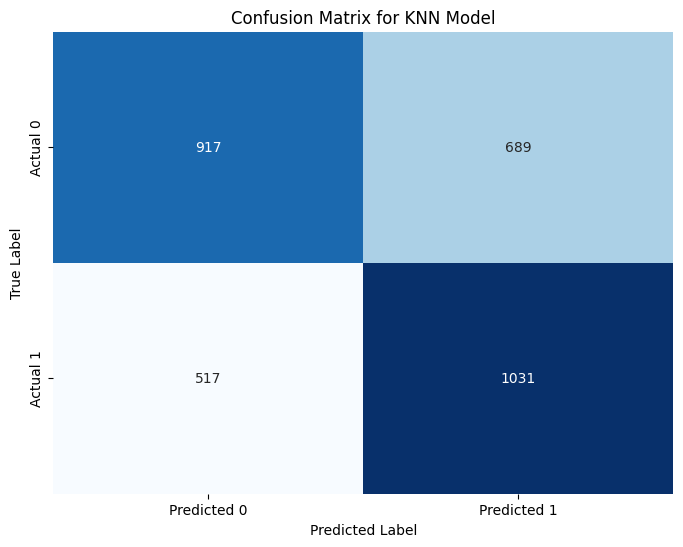

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix for KNN Model')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [ ]:
param_dist = {'n_neighbors': randint(1, 50)}

# Initialize the KNeighborsClassifier model (without a specific k yet)
knn = KNeighborsClassifier()

# Initialize RandomizedSearchCV
# n_iter: number of parameter settings that are sampled
# cv: number of folds for cross-validation
# random_state: for reproducibility
random_search = RandomizedSearchCV(
    knn, param_distributions=param_dist, n_iter=30, cv=3, random_state=42, scoring='f1_macro'
)


In [ ]:
random_search.fit(X_train, y_train)
# Print the best hyperparameter found and its score
print(f"Best 'k' found: {random_search.best_params_['n_neighbors']}")
print(f"Best accuracy score: {random_search.best_score_:.4f}")

Best 'k' found: 3
Best accuracy score: 0.6024


In [ ]:
# You can now use the best estimator for further evaluation or prediction
best_knn_model = random_search.best_estimator_